# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

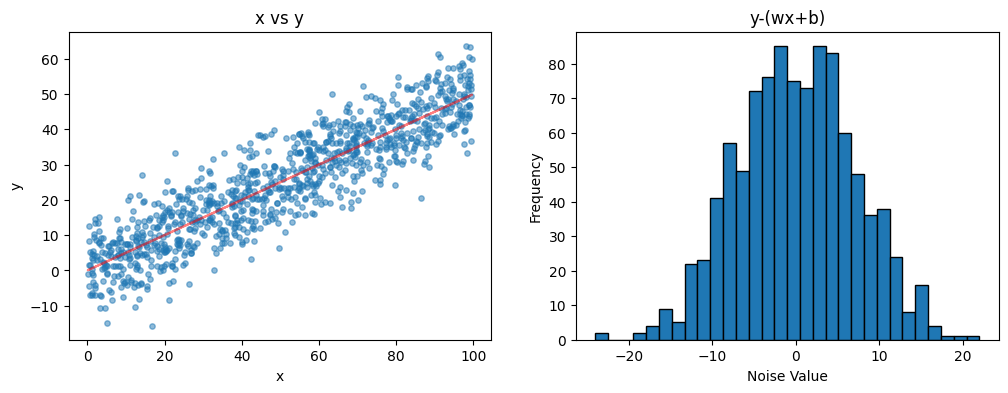

In [28]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
'''
We need to generate 1000 randomized pairs of coordinates (x,y) along a line specified by y=wx+b. 
Because x & y must be approximately linearly dependant, there needs to be noise in the relationship.
So the relationship is y=wx+b+noise.
Because x is random over an interval it should be uniformly distributed.
y-(wx+b) = noise
So the noise should be normally distributed.
'''

num_samples = 1000
w = .5
b = 0

x = np.random.uniform(0,100,num_samples) # Make a list of x values

std_dev = 7 # How strong is the relationship of x to y?
noise = np.random.normal(0,std_dev,num_samples) # Make a list of normally distributed noise values 
y = w*x + b + noise # Define y 

data = [(x[i],y[i]) for i in range(num_samples)] # loop over x & y lists making tuple ordered pairs

# Plot 𝑥 vs 𝑦 and histogram 𝑦−(𝑤𝑥+𝑏).
fig, axs = plt.subplots(1,2,figsize=(12, 4))

x_vals = [X[0] for X in data]
y_vals = [Y[1] for Y in data]

axs[0].plot(x_vals, w * np.array(x_vals), color='red', alpha=.5)
axs[0].scatter(x_vals,y_vals, s=15,alpha=.5)
axs[0].set_title("x vs y")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

residuals = y - (w*x + b) # residual is the amount of noise for each point
axs[1].hist(residuals, bins=30, edgecolor='black')
axs[1].set_title("y-(wx+b)")
axs[1].set_xlabel("Noise Value")
axs[1].set_ylabel("Frequency")

plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [3]:
def model_loop(x,w,b):
    '''
    Establish the lenth of x as m
    create y as an np array of zeros of lenth m
    loop thru y re-defining each index using the equation and the corresponding index of x'''
    m = x.shape[0]
    #print('m =', m)
    y = np.zeros(m)
    for i in range(m): 
        y[i] = w * x[i] + b   
    return y       

y_loop = model_loop(x=x,w=w,b=b)
print("First five of y_loop = ", y_loop[0:5])

def model_np(x,w,b):
    y = w * x + b
    return y

y_np = model_np(x=x,w=w,b=b)
print("First five of y_np = ", y_np[0:5])

if y_loop.all() == y_np.all():
    print("\nThe two are the same! High five , bro!")
else:
    print("\nNot quite, dude")

First five of y_loop =  [44.99087714 16.04454566 15.06876313 24.57396771 16.35653702]
First five of y_np =  [44.99087714 16.04454566 15.06876313 24.57396771 16.35653702]

The two are the same! High five , bro!


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

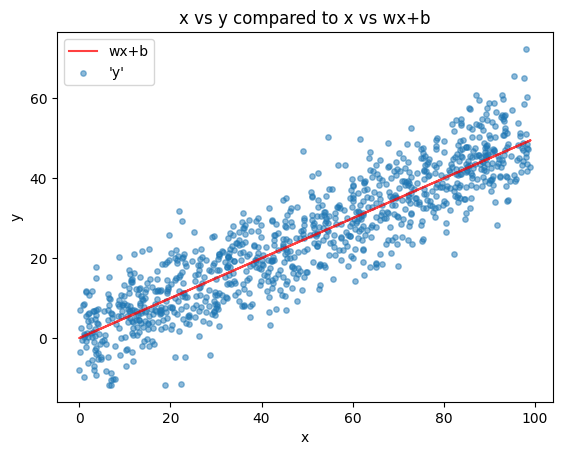

In [4]:
#fig, axs = plt.subplots(1,1)

x_vals = [X[0] for X in data]
y_vals = [Y[1] for Y in data]

plt.plot(x_vals, w * np.array(x_vals), color='red', alpha=.75, label="wx+b")
plt.scatter(x_vals,y_vals, s=15,alpha=.5, label="'y'")
plt.title("x vs y compared to x vs wx+b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


In [5]:
def cost(x,y,w,b):
    y_pred = w * x + b
    mse = np.mean((y - y_pred) ** 2)
    return mse
    

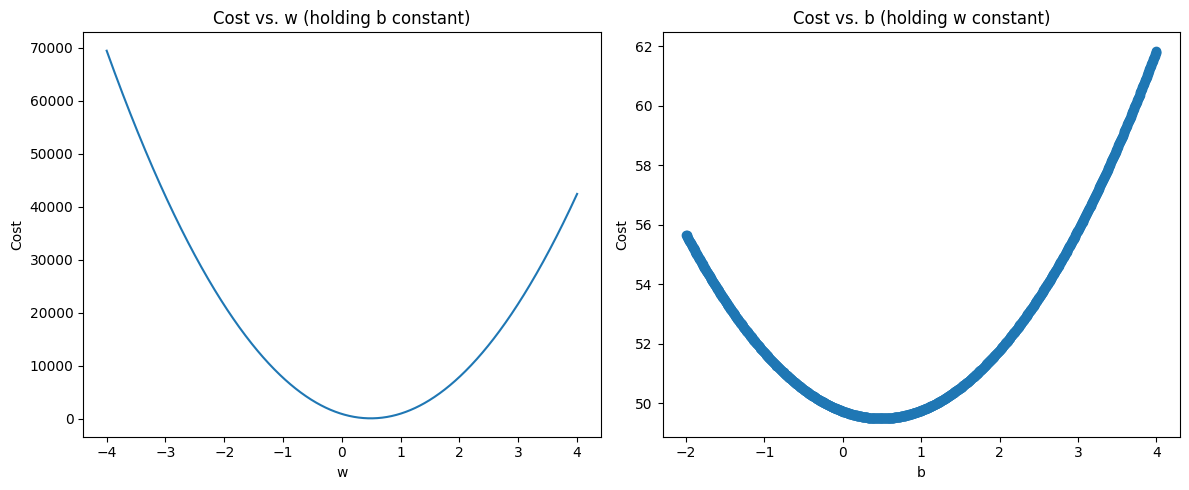

In [6]:
# Parameters from exercise 1
w = .5  # Slope
b = 1  # Intercept
num_samples = 1000

# Generate random values for x
x = np.random.uniform(0, 100, num_samples)

# Calculate y values with normally distributed noise
std_dev = 7 
noise = np.random.normal(0,std_dev,num_samples) 
y = w * x + b + noise

# Range of values for w and b
w_values = np.linspace(-4, 4, num_samples)  # Vary w from 0 to 4
b_values = np.linspace(-2, 4, num_samples)  # Vary b from -2 to 4

# Calculate the cost for different values of w while holding b constant
cost_w = [cost(x, y, w_val, b) for w_val in w_values]

# Calculate the cost for different values of b while holding w constant
cost_b = [cost(x, y, w, b_val) for b_val in b_values]

# Plot the cost vs. w
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(w_values, cost_w)
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost vs. w (holding b constant)')

# Plot the cost vs. b
plt.subplot(1, 2, 2)
plt.plot(b_values, cost_b, marker='o')
plt.xlabel('b')
plt.ylabel('Cost')
plt.title('Cost vs. b (holding w constant)')

plt.tight_layout()
plt.show()

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

In [22]:
# Define gradient function
def gradient(x, y, w, b):
    # Define predicted value y_hat for fwb(x[i]). No loops needed. Thanks numpy
    y_hat = w * x + b 
    # Use (-2) to make calculations cleaner
    # Gradient with respect to w
    dj_dw = (-2 / len(x)) * np.sum(x * (y - y_hat))
    # Gradient with respect to b
    dj_db = (-2 / len(x)) * np.sum(y - y_hat)
    return dj_dw, dj_db

In [23]:
n=num_samples
w_vals = np.array(range(int(-n*.5),int(n*.5)))
#print(w)
b_vals = np.array(range(int(-n*.5),int(n*.5)))
#print(b)

print(type(w_vals))
print(type(x_vals))
print(w_vals[:6],"\n",x_vals[:6],"\n",ytest[:6])

<class 'numpy.ndarray'>
<class 'list'>
[-500 -499 -498 -497 -496 -495] 
 [89.98175427913955, 32.08909131278376, 30.13752625707906, 49.14793542884439, 32.713074042640635, 57.397650315313584] 
 [-44990.87713957 -16012.45656508 -15008.48807603 -24426.52390814
 -16225.68472515 -28411.83690608]


In [24]:
gradient(x_vals,y_vals,w_vals,b_vals)

(175.0999906771183, -6.6853437517303975)

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [26]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

7. Plot the cost and parameters versus iteration of gradient descent.

In [36]:
import copy
import math

num_samples = 1000
x = np.random.uniform(0,100,num_samples) # Make a list of x values
std_dev = 7 # How strong is the relationship of x to y?
noise = np.random.normal(0,std_dev,num_samples) # Make a list of normally distributed noise values 
y = w*x + b + noise # Define y 
data = [(x[i],y[i]) for i in range(num_samples)] # loop over x & y lists making tuple ordered pairs

x_vals = np.array([X[0] for X in data])
y_vals = np.array([Y[1] for Y in data])

w_vals = np.array(range(int(-num_samples*.5),int(num_samples*.5)))
b_vals = np.array(range(int(-num_samples*.5),int(num_samples*.5)))

def cost(x,y,w,b):
    y_pred = w * x + b
    mse = np.mean((y - y_pred) ** 2)
    return mse

def gradient(x, y, w, b):
    # Define predicted value y_hat for fwb(x[i]). No loops needed. Thanks numpy
    y_hat = w * x + b 
    # Use (-2) to make calculations cleaner
    # Gradient with respect to w
    dj_dw = (-2 / len(x)) * np.sum(x * (y - y_hat))
    # Gradient with respect to b
    dj_db = (-2 / len(x)) * np.sum(y - y_hat)
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 5.24e+00  dj_dw: -7.027e+01, dj_db: -1.086e+01   w:  7.027e-01, b: 1.08569e-01
Iteration  100: Cost 1.03e+00  dj_dw:  1.599e-02, dj_db: -1.053e-01   w:  1.033e+00, b: 2.98571e-01
Iteration  200: Cost 1.02e+00  dj_dw:  9.634e-03, dj_db: -6.340e-02   w:  1.020e+00, b: 3.80930e-01
Iteration  300: Cost 1.02e+00  dj_dw:  5.804e-03, dj_db: -3.819e-02   w:  1.013e+00, b: 4.30542e-01
Iteration  400: Cost 1.02e+00  dj_dw:  3.496e-03, dj_db: -2.301e-02   w:  1.008e+00, b: 4.60428e-01
Iteration  500: Cost 1.02e+00  dj_dw:  2.106e-03, dj_db: -1.386e-02   w:  1.005e+00, b: 4.78430e-01
Iteration  600: Cost 1.02e+00  dj_dw:  1.269e-03, dj_db: -8.349e-03   w:  1.004e+00, b: 4.89275e-01
Iteration  700: Cost 1.02e+00  dj_dw:  7.642e-04, dj_db: -5.029e-03   w:  1.003e+00, b: 4.95807e-01
Iteration  800: Cost 1.02e+00  dj_dw:  4.603e-04, dj_db: -3.029e-03   w:  1.002e+00, b: 4.99743e-01
Iteration  900: Cost 1.02e+00  dj_dw:  2.773e-04, dj_db: -1.825e-03   w:  1.002e+00, b: 5.02113e-01


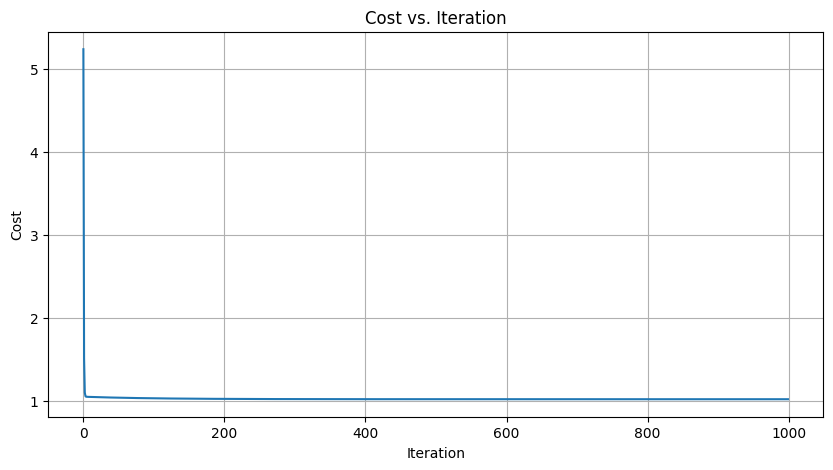

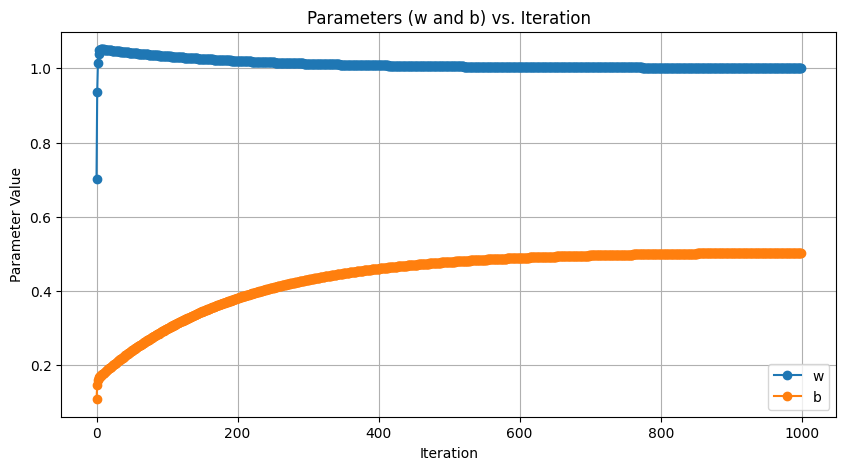

In [38]:

# Generate sample data with different parameters
w_true = 1.0  # True slope
b_true = .5  # True intercept
sample_size = 1000

x = np.random.uniform(0, 10, num_samples)
noise = np.random.normal(0, 1, num_samples)
y = w_true * x + b_true + noise

# Choose arbitrary initial values for w and b
w_initial = 0.0
b_initial = 0.0
# Hyperparameters
alpha = 0.01  # Learning rate
num_iters = 1000
# Perform gradient descent to fit the line
w_final, b_final, J_history, p_history = gradient_descent(x, y, w_initial, b_initial, alpha, num_iters, cost, gradient)
# Plot the cost vs. iterations
plt.figure(figsize=(10, 5))
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.grid(True)
plt.show()
# Extract parameters w and b at each iteration
w_history, b_history = zip(*p_history)

# Plot w and b vs. iterations
plt.figure(figsize=(10, 5))
plt.plot(range(len(w_history)), w_history, marker='o', label='w')
plt.plot(range(len(b_history)), b_history, marker='o', label='b')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.legend()
plt.title('Parameters (w and b) vs. Iteration')
plt.grid(True)
plt.show()
